In [1]:
import eclabfiles as ecf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import munch
import yaml

In [13]:
DATE = '03-20'

In [14]:
# loading data
folder_name = f'T:/Team/Szewczyk/Data/2024-{DATE}'
with open(f'{folder_name}/properties.yaml') as file:
    props_dict = yaml.safe_load(file)
props:munch.Munch = munch.munchify(props_dict)
props.keys()

dict_keys(['codename', 'date', 'el_name', 'el_area', 'voltage', 'CV_file', 'illumination', 'osc_type', 'pert'])

In [15]:
data = ecf.to_df(f'{folder_name}/{props.codename}{props.CV_file}_C02.mpr')

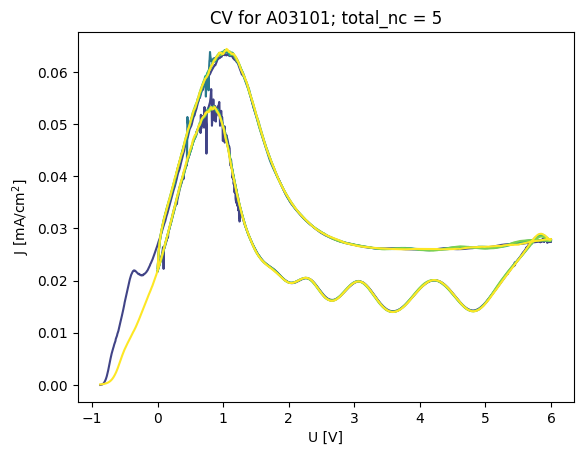

In [17]:
total_nc = int(data['cycle number'].iloc[-1])
fig = plt.figure()
plt.title(f'CV for {props.codename}{props.CV_file}; {total_nc = }')
plt.xlabel('U [V]')
plt.ylabel('J [mA/cm$^2$]')
for i in range(1, total_nc+1):
    cycle = data[data['cycle number'] == i]
    plt.plot(cycle.Ewe, 10*cycle['<I>']/props.el_area, color=plt.cm.viridis(i/total_nc))

In [18]:
OVERWRITE = False

folder_name = f'C:/Users/go68nim/OneDrive - University of Edinburgh/Notes/Lab/experiments/plots/{DATE[1:]}'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
if (os.path.exists(f'{folder_name}/CV.png') & (OVERWRITE == False)):
    print('File exists. If you want to overwrite it, set <OVERWRITE> to <True>.')
else:
    fig.savefig(f'{folder_name}/CV.png')